Author: **SRISAICHARAN VELISETTI**



# Pyramid Image  

## Overview
Choose an image that has interesting variety of textures (from Flickr or your own images). The images should be atleast 640X480 pixels and converted to grayscale. Write code for a Gaussian and Laplacian pyramid of level N (use for loops). In each level, the resolution should be reduced by a factor of 2. Show the pyramids for your chosen image in your write-up. Here is an [example](https://drive.google.com/uc?id=17Y287EA-GJ2z0wtm_M7StIWsXyFeHvrz).

## Data

**WARNING: Colab deletes all files everytime runtime is disconnected. Make sure to re-download the inputs when it happens.**

In [122]:
# Download Data -- run this cell only one time per runtime
# !gdown 1oOxF1fChnRtrJ7sa_L3G8UVkKlh6IOlT
!gdown 1R2hxcMNnlB6zPKma659XkW33WzsSxDY2
# !unzip "/content/hybrid_pyramid_input.zip" -d "/content/"

Downloading...
From: https://drive.google.com/uc?id=1R2hxcMNnlB6zPKma659XkW33WzsSxDY2
To: /content/wolf.jpg
100% 209k/209k [00:00<00:00, 73.3MB/s]


## Code

In [123]:
def pyramidsGL(image, num_levels):
  ''' Creates Gaussian (G) and Laplacian (L) pyramids of level "num_levels" from image im. 
  G and L are list where G[i], L[i] stores the i-th level of Gaussian and Laplacian pyramid, respectively. '''
  layer = image.copy()
  gaussian_pyramid = [layer]    #Gaussian Pyramid
  laplacian_pyramid = []         # Laplacian Pyramid
  for i in range(num_levels):
    blur = cv2.GaussianBlur(gaussian_pyramid[i], (5,5),5)
    laplacian = gaussian_pyramid[i]-blur
    width = int(blur.shape[1] / 2)
    height = int(blur.shape[0] / 2)
    layer = cv2.resize(blur,(width,height))
    gaussian_pyramid.append(layer)
    laplacian_pyramid.append(laplacian)
  gaussian_pyramid.pop(-1)
  return gaussian_pyramid, laplacian_pyramid

def display_resizedpyramids(gaussian_pyramid, laplacian_pyramid, num_levels):
  gaussian_pyramid_resized, laplacian_pyramid_resized=[],[]
  for i in range(num_levels):
    img_gaussian_pyramid= cv2.resize(gaussian_pyramid[i],(img.shape[0],img.shape[1]))
    img_laplacian_pyramid = cv2.resize(laplacian_pyramid[i],(img.shape[0],img.shape[1]))
    gaussian_pyramid_resized.append(img_gaussian_pyramid)
    laplacian_pyramid_resized.append(img_laplacian_pyramid)
  fig, plot_arr = plt.subplots(2, 5,figsize=(25, 10))
  plt.gcf().set_facecolor('white')
  fig.suptitle('Gaussian and Laplacian Pyramids', fontsize=16)
  plot_arr[0,0].imshow(gaussian_pyramid_resized[0],cmap='gray')
  plot_arr[0,0].set_title("Gaussian_1")
  plot_arr[0,0].axis('off')
  plot_arr[0,1].imshow(gaussian_pyramid_resized[1],cmap='gray')
  plot_arr[0,1].set_title("Gaussian_2")
  plot_arr[0,1].axis('off')
  plot_arr[0,2].imshow(gaussian_pyramid_resized[2],cmap='gray')
  plot_arr[0,2].set_title("Gaussian_3")
  plot_arr[0,2].axis('off')
  plot_arr[0,3].imshow(gaussian_pyramid_resized[3],cmap='gray')
  plot_arr[0,3].set_title("Gaussian_4")
  plot_arr[0,3].axis('off')
  plot_arr[0,4].imshow(gaussian_pyramid_resized[4],cmap='gray')
  plot_arr[0,4].set_title("Gaussian_5")
  plot_arr[0,4].axis('off')
  plot_arr[1,0].imshow(laplacian_pyramid_resized[0],cmap='gray')
  plot_arr[1,0].set_title("Laplacian_1")
  plot_arr[1,0].axis('off')
  plot_arr[1,1].imshow(laplacian_pyramid_resized[1],cmap='gray')
  plot_arr[1,1].set_title("Laplacian_2")
  plot_arr[1,1].axis('off')
  plot_arr[1,2].imshow(laplacian_pyramid_resized[2],cmap='gray')
  plot_arr[1,2].set_title("Laplacian_3")
  plot_arr[1,2].axis('off')
  plot_arr[1,3].imshow(laplacian_pyramid_resized[3],cmap='gray')
  plot_arr[1,3].set_title("Laplacian_4")
  plot_arr[1,3].axis('off')
  plot_arr[1,4].imshow(laplacian_pyramid_resized[4],cmap='gray')
  plot_arr[1,4].set_title("Laplacian_5")
  plot_arr[1,4].axis('off')
  plt.show()
  return gaussian_pyramid_resized, laplacian_pyramid_resized


def log_mag_FFT(image):
  magnitude_spectrum = 20*np.log(np.abs(np.fft.fftshift(np.fft.fft2(image))))
  return magnitude_spectrum

def displayPyramids(G, L):
  fig, plot_arr_fft = plt.subplots(2, 5,figsize=(25, 10))
  plt.gcf().set_facecolor('white')
  fig.suptitle(' Fast Fourier Transform of Gaussian and Laplacian Pyramids', fontsize=16)
  plot_arr_fft[0,0].imshow(log_mag_FFT(G[0]),cmap='jet')
  plot_arr_fft[0,0].set_title("Gaussian_1_FFT")
  plot_arr_fft[0,0].axis('off')
  plot_arr_fft[0,1].imshow(log_mag_FFT(G[1]),cmap='jet')
  plot_arr_fft[0,1].set_title("Gaussian_2_FFT")
  plot_arr_fft[0,1].axis('off')
  plot_arr_fft[0,2].imshow(log_mag_FFT(G[2]),cmap='jet')
  plot_arr_fft[0,2].set_title("Gaussian_3_FFT")
  plot_arr_fft[0,2].axis('off')
  plot_arr_fft[0,3].imshow(log_mag_FFT(G[3]),cmap='jet')
  plot_arr_fft[0,3].set_title("Gaussian_4_FFT")
  plot_arr_fft[0,3].axis('off')
  plot_arr_fft[0,4].imshow(log_mag_FFT(G[4]),cmap='jet')
  plot_arr_fft[0,4].set_title("Gaussian_5_FFT")
  plot_arr_fft[0,4].axis('off')
  plot_arr_fft[1,0].imshow(log_mag_FFT(L[0]),cmap='jet')
  plot_arr_fft[1,0].set_title("Laplacian_1_FFT")
  plot_arr_fft[1,0].axis('off')
  plot_arr_fft[1,1].imshow(log_mag_FFT(L[1]),cmap='jet')
  plot_arr_fft[1,1].set_title("Laplacian_2_FFT")
  plot_arr_fft[1,1].axis('off')
  plot_arr_fft[1,2].imshow(log_mag_FFT(L[2]),cmap='jet')
  plot_arr_fft[1,2].set_title("Laplacian_3_FFT")
  plot_arr_fft[1,2].axis('off')
  plot_arr_fft[1,3].imshow(log_mag_FFT(L[3]),cmap='jet')
  plot_arr_fft[1,3].set_title("Laplacian_4_FFT")
  plot_arr_fft[1,3].axis('off')
  plot_arr_fft[1,4].imshow(log_mag_FFT(L[4]),cmap='jet')
  plot_arr_fft[1,4].set_title("Laplacian_5_FFT")
  plot_arr_fft[1,4].axis('off')
  plt.show()

def reconstructLaplacianPyramid(L):
  '''Given a Laplacian Pyramid L, reconstruct an image img.'''
  for i in range((len(L)-2), -1,-1):
    _h = L[i+1].shape[1]
    _w = L[i+1].shape[0]
    if i == len(L)-2:
      G_rec = L[i] + cv2.GaussianBlur(cv2.resize(L[i+1], (int(_h*2), int(_w*2))),(5,5),1)
    else:
      G_rec = L[i] + cv2.GaussianBlur(cv2.resize(G_rec, (int(G_rec.shape[1]*2),int(G_rec.shape[0]*2))),(5,5),1)
  return G_rec
  

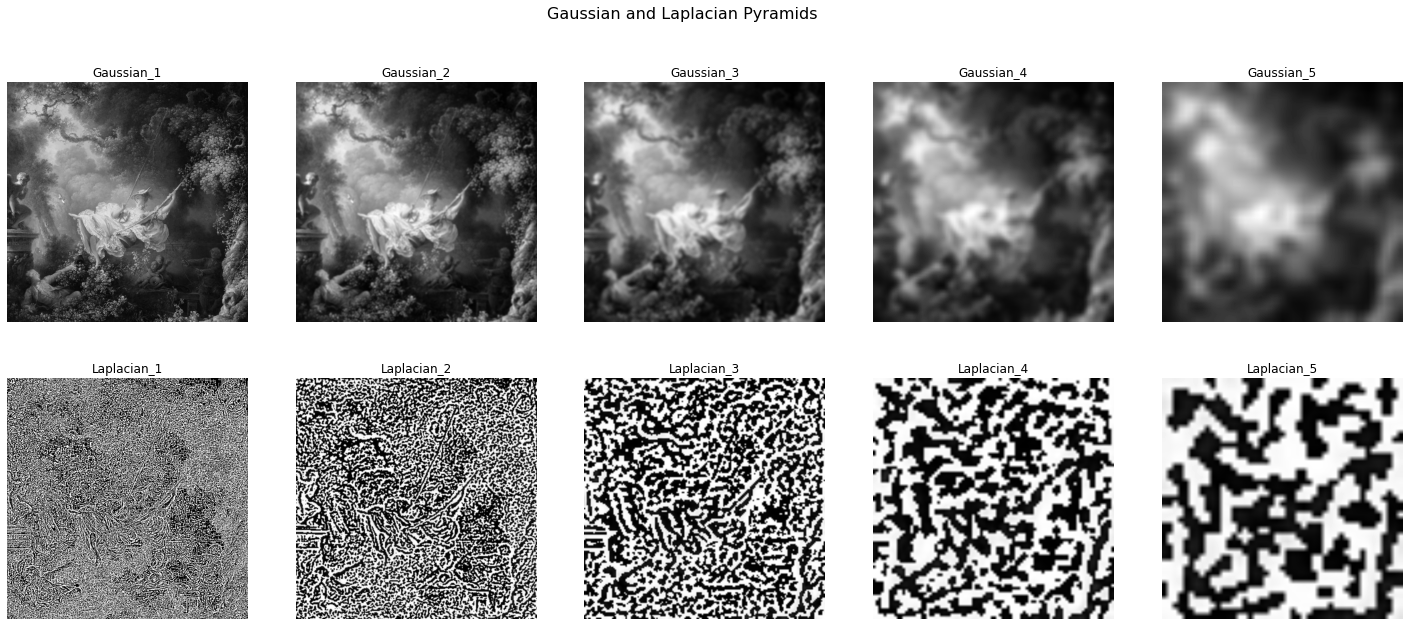

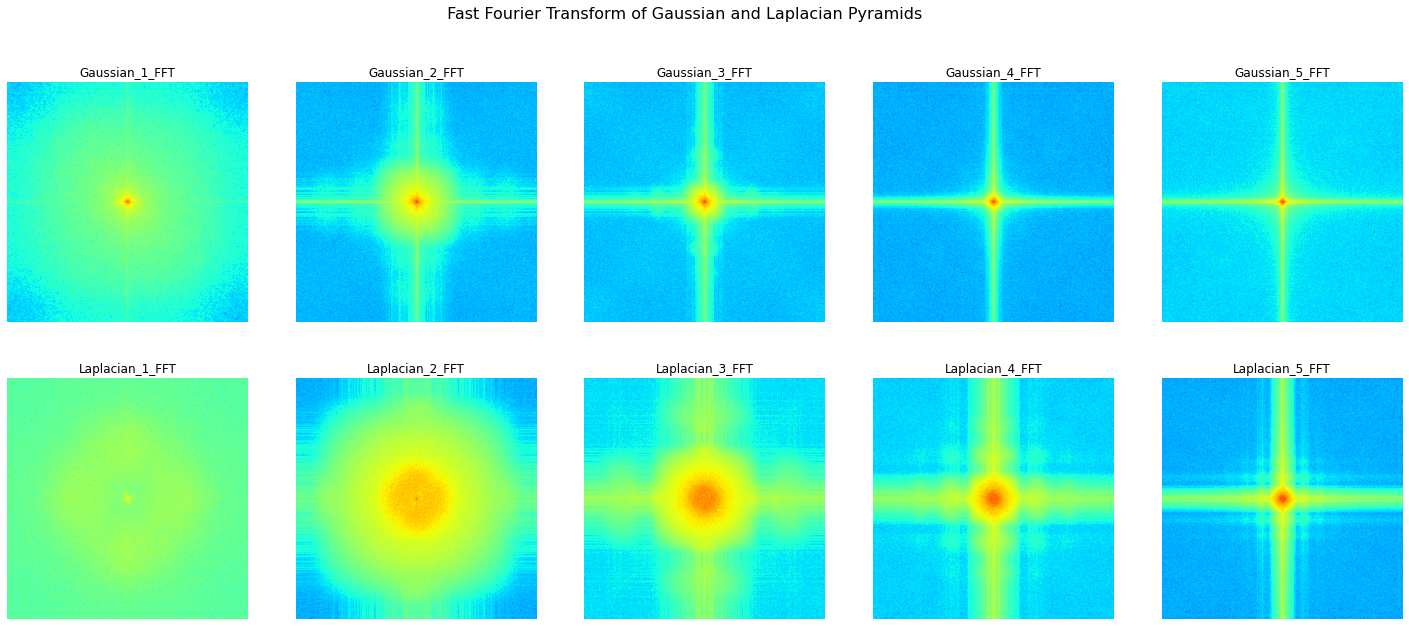

In [124]:
import cv2
import numpy as np
import PIL
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

img = cv2.imread('/content/test.jpg',0)
num_levels = 5
gaussian_pyramid,laplacian_pyramid= pyramidsGL(img,num_levels)
gaussian_pyramid_resized,laplacian_pyramid_resized = display_resizedpyramids(gaussian_pyramid,laplacian_pyramid,num_levels)
displayPyramids(gaussian_pyramid_resized,laplacian_pyramid_resized)
laplacian_pyramid[-1] = gaussian_pyramid[-1]
img_reconstructed = reconstructLaplacianPyramid(laplacian_pyramid)


(-0.5, 719.5, 719.5, -0.5)

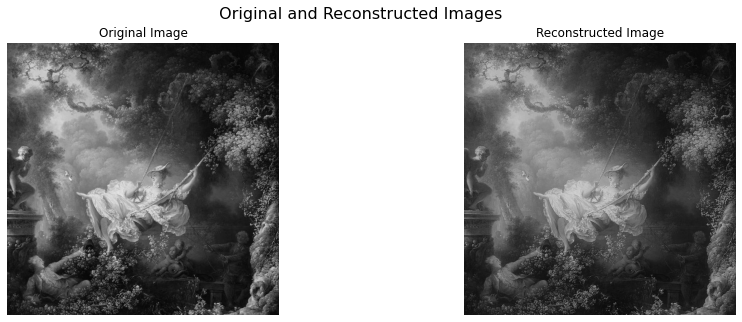

In [125]:
fig1, plot_arr1 = plt.subplots(1, 2,figsize=(15, 5))
fig1.suptitle(' Original and Reconstructed Images', fontsize=16)
plt.gcf().set_facecolor('white')
plot_arr1[0].imshow(img, cmap='gray')
plot_arr1[0].set_title("Original Image")
plot_arr1[0].axis('off')
plot_arr1[1].imshow(img_reconstructed, cmap='gray')
plot_arr1[1].set_title("Reconstructed Image")
plot_arr1[1].axis('off')

In Gaussian pyramid, smoothing removes high-frequency components resulting in aliasing and displays low resolution images as the number of levels increase.The images lose image-structure information corresponding to high frequency components, decreasing the image quality. 

In Laplacian pyramid, images are obtained from lost high- frequency components and these lost frequencies of the images can be regained.

The Gaussian and Laplacian pyramids, retain the superior frequency orientations and their corresponding low and high frequency components respectively.

